#LabWeek9: Prevent Overfitting - Part I

Dhruvish Kanani

## Importing Dataset: IMDB

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Note:** We first encountered this dataset in `LabWeek5`. You can refer to that notebook for clarification on the text-to-numbers decoding process. Through vectorizing process we turn text data into vectors.

**Perform some sanity checks on the dataset:** For example, find the `shape` of the dataset and print samples to make sense of the data.

In [ ]:
dataset_shapes = {
    "x_train shape": x_train.shape,
    "x_test shape": x_test.shape,
    "y_train shape": y_train.shape,
    "y_test shape": y_test.shape,
    "First training sample (vectorized)": x_train[0][:100],  # Showing first 100 indices
    "First training label": y_train[0]
}

dataset_shapes

{'x_train shape': (25000, 10000),
 'x_test shape': (25000, 10000),
 'y_train shape': (25000,),
 'y_test shape': (25000,),
 'First training sample (vectorized)': array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]),
 'First training label': 1.0}

## Fighting overfitting -  Reducing the network's size


The general workflow to find an appropriate model size is to start with relatively few layers and
parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the
validation loss.



**Note:** we use `test set` as our `validation set`.

**Complete the following code for `original model` architecture**

In [ ]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [ ]:
original_model.summary()

**Define another model with fewer parameters. 4 units in each hidden layer.**

In [ ]:
smaller_model = models.Sequential()



**Train (1) original_model and (2) smaller_model seperately for `epochs=20` and `batch_size=512`. Also pass `x_test` and `y_test` as `validation_data`.**

In [ ]:
original_hist = ...

In [ ]:
smaller_hist = ...

In [ ]:
from keras import models, layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))
smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test),
                                   verbose=1)

smaller_hist = smaller_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test),
                                 verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - acc: 0.7454 - loss: 0.5696 - val_acc: 0.8699 - val_loss: 0.3658
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9029 - loss: 0.2987 - val_acc: 0.8779 - val_loss: 0.3091
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9220 - loss: 0.2264 - val_acc: 0.8886 - val_loss: 0.2792
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - acc: 0.9361 - loss: 0.1858 - val_acc: 0.8854 - val_loss: 0.2848
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9464 - loss: 0.1595 - val_acc: 0.8856 - val_loss: 0.2915
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9546 - loss: 0.1402 - val_acc: 0.8797 - val_loss: 0.3100
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - acc: 0.9619 - loss: 0.1234 - val_acc: 0.8759 - val_loss: 0.3329
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.9630 - loss: 0.1129 - val_acc: 0.8765 - val_loss: 0.3435
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - acc: 0.9693

**`orginal_hist` and `smaller_hist` are `objects` returned after training the models.**
- We can get access to the `history` attribute of `origial_hist` object through dot operator.
- TODO: The history attribute is a data structure of type `dictionary` containing data about everything that happened during training. Show the `keys` of this `dictionary`.

In [ ]:
print(original_hist.history)


history_keys = original_hist.history.keys()
history_keys

print(original_hist.history.keys())


{'acc': [0.8185200095176697, 0.9015600085258484, 0.9222000241279602, 0.9325199723243713, 0.9427599906921387, 0.950160026550293, 0.9557999968528748, 0.9615200161933899, 0.9654399752616882, 0.9699599742889404, 0.9730799794197083, 0.9775999784469604, 0.9811599850654602, 0.9843999743461609, 0.9877600073814392, 0.9894000291824341, 0.9924399852752686, 0.9936400055885315, 0.9939600229263306, 0.9969599843025208], 'loss': [0.4787035286426544, 0.28400546312332153, 0.2215837836265564, 0.18786025047302246, 0.16387537121772766, 0.14727333188056946, 0.1302352249622345, 0.11729468405246735, 0.10416664183139801, 0.09322100877761841, 0.08441964536905289, 0.07419508695602417, 0.06463731825351715, 0.05603960528969765, 0.04823920503258705, 0.041521698236465454, 0.033983707427978516, 0.029652373865246773, 0.02634209208190441, 0.018102021887898445], 'val_acc': [0.8698800206184387, 0.8779199719429016, 0.8885599970817566, 0.8853999972343445, 0.8855599761009216, 0.8796799778938293, 0.8758800029754639, 0.876519

**Plot `val_loss` vs. epochs for both models in one plot**

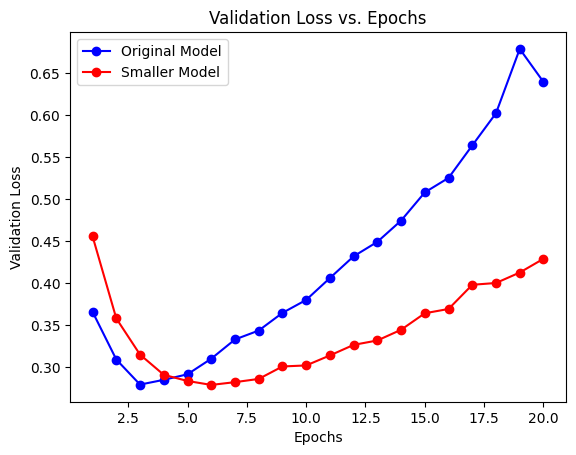

In [ ]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

original_val_loss = original_hist.history['val_loss']
smaller_val_loss = smaller_hist.history['val_loss']
epochs = range(1, len(original_val_loss) + 1)

plt.plot(epochs, original_val_loss, 'bo-', label='Original Model')
plt.plot(epochs, smaller_val_loss, 'ro-', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()
plt.show()


**Plot training `loss` vs. epochs for both models in one plot**

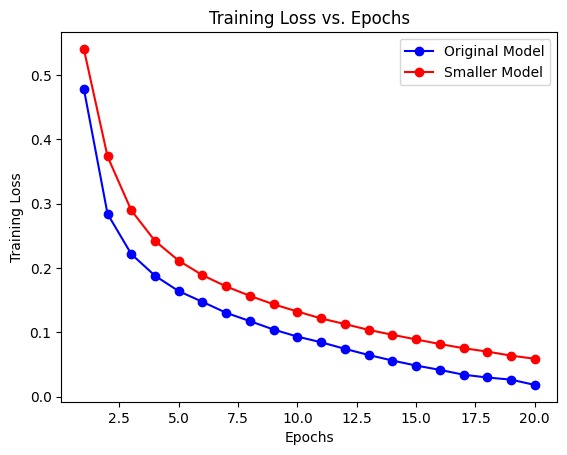

In [ ]:
import matplotlib.pyplot as plt
original_train_loss = original_hist.history['loss']
smaller_train_loss = smaller_hist.history['loss']
epochs = range(1, len(original_train_loss) + 1)
plt.plot(epochs, original_train_loss, 'bo-', label='Original Model')
plt.plot(epochs, smaller_train_loss, 'ro-', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.show()


**Questions:** Which model overfits earlier? How can you see the size of the model on overfitting?

**Answer:**

The original model overfits earlier because its validation loss starts increasing sooner than the smaller model. A larger model with more parameters captures noise in the training data, leading to overfitting. The model size directly affects overfitting—smaller models generalize better, while larger models tend to memorize training data.


**Now define a very large model (e.g., with 512 units in hidden layer) and compare the `loss` and `val_loss` of this big model and the `original model` and `smaller_model`.**

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 378ms/step - acc: 0.6876 - loss: 0.6000 - val_acc: 0.8738 - val_loss: 0.3158
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 485ms/step - acc: 0.8901 - loss: 0.2747 - val_acc: 0.8900 - val_loss: 0.2671
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 355ms/step - acc: 0.9185 - loss: 0.2054 - val_acc: 0.8873 - val_loss: 0.2705
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 361ms/step - acc: 0.9417 - loss: 0.1539 - val_acc: 0.8863 - val_loss: 0.2903
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - acc: 0.9590 - loss: 0.1145 - val_acc: 0.8832 - val_loss: 0.2850
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 464ms/step - acc: 0.9761 - loss: 0.0753 - val_acc: 0.8820 - val_loss: 0.3645
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 383ms/step - acc: 0.9831 - loss: 0.0547 - val_acc: 0.7392 - val_loss: 1.1363
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 465ms/step - acc: 0.9613 - loss: 0.1161 - val_acc: 0.8809 - val_loss: 0.3426
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 449ms/

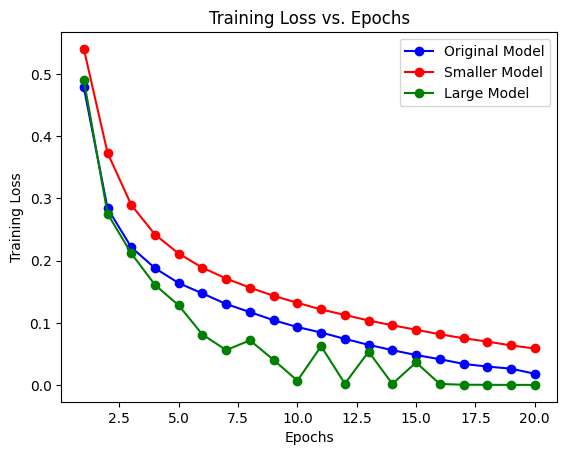

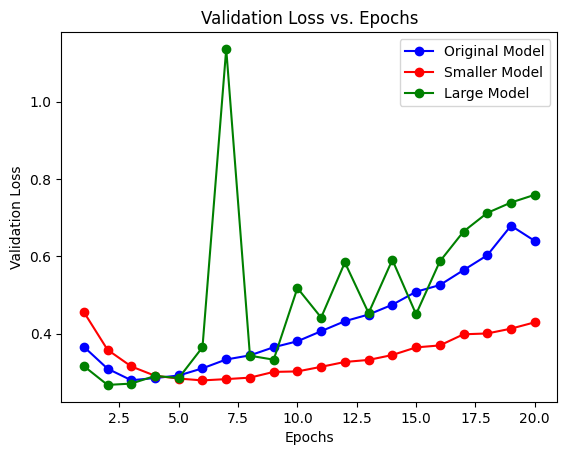

In [ ]:

large_model = models.Sequential()
large_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
large_model.add(layers.Dense(512, activation='relu'))
large_model.add(layers.Dense(1, activation='sigmoid'))

large_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

large_hist = large_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test),
                             verbose=1)

original_train_loss = original_hist.history['loss']
original_val_loss = original_hist.history['val_loss']

smaller_train_loss = smaller_hist.history['loss']
smaller_val_loss = smaller_hist.history['val_loss']

large_train_loss = large_hist.history['loss']
large_val_loss = large_hist.history['val_loss']

epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'bo-', label='Original Model')
plt.plot(epochs, smaller_train_loss, 'ro-', label='Smaller Model')
plt.plot(epochs, large_train_loss, 'go-', label='Large Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.show()

plt.plot(epochs, original_val_loss, 'bo-', label='Original Model')
plt.plot(epochs, smaller_val_loss, 'ro-', label='Smaller Model')
plt.plot(epochs, large_val_loss, 'go-', label='Large Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()
plt.show()


**Discuss the results**

**Answer:**
Overfitting Behavior:

The large model (512 units) overfits the fastest. It achieves a very low training loss quickly, but its validation loss increases rapidly, showing poor generalization.
The original model (16 units) overfits slower than the large model but still exhibits increasing validation loss after a few epochs.
The smaller model (4 units) overfits the least and generalizes better, as its validation loss remains relatively stable.
Impact of Model Size on Overfitting:

Larger models with more parameters tend to memorize the training data rather than learning generalizable patterns.
Smaller models are more resistant to overfitting because they lack the capacity to store excessive information, forcing them to focus on the most relevant patterns.
Loss Trends:

Training loss: The large model has the lowest training loss, but this does not translate to better validation performance.
Validation loss: The large model’s validation loss increases quickly, confirming overfitting.


## Fighting overfitting - Adding weight regularization


A common way to mitigate overfitting is to put constraints on the complexity
of a network by forcing its weights to only take small values. This is called
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments.


**Complere the model below**

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))


l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))

l2_model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training
than at test time.



**Train the model with regularization and compare the validation loss between this model and the `original_model` and `smaller model`.**

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 0.7466 - loss: 0.6077 - val_acc: 0.8572 - val_loss: 0.4162
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.8954 - loss: 0.3481 - val_acc: 0.8836 - val_loss: 0.3482
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9200 - loss: 0.2806 - val_acc: 0.8887 - val_loss: 0.3306
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.9316 - loss: 0.2499 - val_acc: 0.8866 - val_loss: 0.3346
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9369 - loss: 0.2375 - val_acc: 0.8849 - val_loss: 0.3438
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9402 - loss: 0.2239 - val_acc: 0.8802 - val_loss: 0.3542
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9426 - loss: 0.2209 - val_acc: 0.8788 - val_loss: 0.3637
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9451 - loss: 0.2113 - val_acc: 0.8780 - val_loss: 0.3665
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.9503

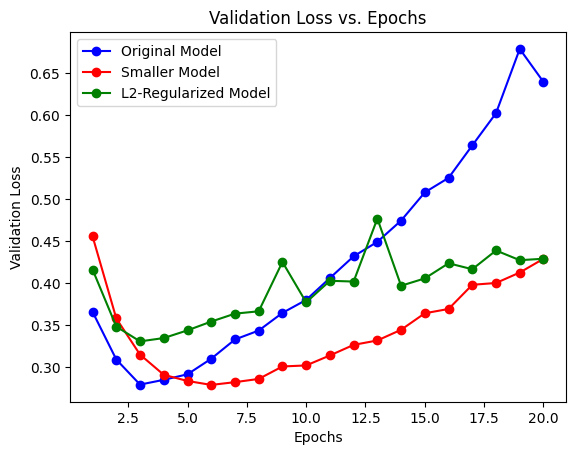

In [ ]:

l2_hist = l2_model.fit(x_train, y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_test, y_test),
                        verbose=1)

l2_val_loss = l2_hist.history['val_loss']
original_val_loss = original_hist.history['val_loss']
smaller_val_loss = smaller_hist.history['val_loss']

epochs = range(1, len(original_val_loss) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'bo-', label='Original Model')
plt.plot(epochs, smaller_val_loss, 'ro-', label='Smaller Model')
plt.plot(epochs, l2_val_loss, 'go-', label='L2-Regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()
plt.show()


**Note:** As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [ ]:
from keras import regularizers

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)

l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])


## Recap

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout. (next session)

**Observation 1:** The bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large
difference between the training and validation loss).

**Observation 2:** The model with L2 regularization has become much more resistant to overfitting than the reference model,
even though both models have the same number of parameters.